# WeatherPy
----

#### Summary analysis:
* In this dataset, there are more cities in northern hemisphere then southern, which is a result of the fact 90% of the human population and more landmass in the northern hemisphere.
* Overall,the temperature is higher when latitude approching the equator,and vice versa.(fig:lat vs. temp plot)
* The cities around the equator have high humidity and cloudiness mostly.(fig:lat vs. humidity and lat vs. cloudiness plot), this could be the reason why the temperature around equotor isn't the highest.
* When comparing the northern and southern hemisphere, northern has more extreme temperature (30-100F) and lower wind speed than southern (40-90F), this is possibly because of there are more ocean to adjust the temperature and less land (or mountains) to lower the wind speed in southern hemisphere. A further study bases on the land, ocean papulation percentage in northern and southern hemisphere to compare the weather conditions/ factors will help to understand and the weather difference between them.

In [1]:
#pip install citipy

In [311]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [165]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [166]:
cities

['tongren',
 'bengkulu',
 'tommot',
 'cherskiy',
 'yellowknife',
 'khatanga',
 'avarua',
 'correntina',
 'eydhafushi',
 'ponta do sol',
 'lolua',
 'inta',
 'smithers',
 'esperance',
 'tuktoyaktuk',
 'thompson',
 'kapaa',
 'rikitea',
 'prince rupert',
 'qaanaaq',
 'buala',
 'beyneu',
 'kaduy',
 'sumbawa',
 'constitucion',
 'hilo',
 'husavik',
 'ancud',
 'nishihara',
 'uni',
 'zonguldak',
 'lebu',
 'mentougou',
 'kuche',
 'wahran',
 'sinnamary',
 'ushuaia',
 'cape town',
 'sept-iles',
 'leningradskiy',
 'busselton',
 'butaritari',
 'upernavik',
 'cidreira',
 'mataura',
 'montefiascone',
 'luderitz',
 'zyryanka',
 'bredasdorp',
 'carnarvon',
 'attawapiskat',
 'ust-kamchatsk',
 'dikson',
 'artyk',
 'punta arenas',
 'saldanha',
 'isla mujeres',
 'cayenne',
 'mayo',
 'kahului',
 'pangnirtung',
 'rzhev',
 'atuona',
 'grand-lahou',
 'kuhdasht',
 'taolanaro',
 'orange cove',
 'chokurdakh',
 'fairbanks',
 'illoqqortoormiut',
 'nosy varika',
 'grand river south east',
 'nikolskoye',
 'nome',
 'ku

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [167]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

weatherdata =[]

for city in cities:
    
    # Build query URL
    queryURL= f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Get weather data
    weatherResponse = requests.get(queryURL).json()
    #pprint(f"{weatherResponse}")
    
    try:
        city=weatherResponse['name']
        cloudiness=weatherResponse['clouds']['all']
        country=weatherResponse['sys']['country']
        date=weatherResponse['dt']
        humidity=weatherResponse['main']['humidity']
        lng=weatherResponse['coord']['lon']
        lat=weatherResponse['coord']['lat']
        maxtemp=weatherResponse['main']['temp_max']
        windspeed=weatherResponse['wind']['speed']
    
        weatherdata.append({'City':city,
                        'Lat':lat,
                        'Lng':lng,
                        'Max Temp':maxtemp,
                        'Humidity':humidity,
                        'Cloudiness':cloudiness,
                        'Wind Speed':windspeed,
                        'Country':country,
                        'Date':date
                       })
    
    except (KeyError, IndexError): 
        print(f"City not found. Skipping...")
    
weatherdata_pd=pd.DataFrame(weatherdata)

weatherdata_pd



City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tongren,27.7172,109.1853,89.87,63,55,7.43,CN,1658377437
1,Bengkulu,-3.8004,102.2655,83.68,68,24,3.98,ID,1658377437
2,Tommot,58.9564,126.2925,78.40,55,13,4.36,RU,1658377438
3,Cherskiy,68.7500,161.3000,47.57,40,14,19.39,RU,1658377438
4,Yellowknife,62.4560,-114.3525,66.72,42,20,10.36,CA,1658377438
...,...,...,...,...,...,...,...,...,...
561,Arari,-3.4536,-44.7800,70.41,82,32,2.71,BR,1658377651
562,Villa Unión,23.2000,-106.2333,86.92,79,40,5.75,MX,1658377652
563,Humaitá,-7.5061,-63.0208,73.04,56,6,0.92,BR,1658377652
564,Banjar,-8.1900,114.9675,86.70,56,74,3.11,ID,1658377652


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [171]:
weatherdata_pd.to_csv("../output_data/cities.csv")

In [172]:
weatherdata_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tongren,27.7172,109.1853,89.87,63,55,7.43,CN,1658377437
1,Bengkulu,-3.8004,102.2655,83.68,68,24,3.98,ID,1658377437
2,Tommot,58.9564,126.2925,78.40,55,13,4.36,RU,1658377438
3,Cherskiy,68.7500,161.3000,47.57,40,14,19.39,RU,1658377438
4,Yellowknife,62.4560,-114.3525,66.72,42,20,10.36,CA,1658377438


In [216]:
weatherdata_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.863516,20.575079,69.421696,71.943463,52.436396,7.973145,1.658378e+09
std,32.969229,89.162220,13.465574,20.157091,39.476154,5.649401,1.281431e+02
min,-54.800000,-179.166700,29.860000,1.000000,0.000000,0.110000,1.658377e+09
25%,-5.082050,-57.182025,60.087500,62.000000,9.250000,3.760000,1.658377e+09
50%,25.004400,26.039000,70.095000,76.000000,59.000000,6.390000,1.658378e+09
75%,49.429175,101.976925,80.282500,88.000000,95.000000,10.375000,1.658378e+09
max,78.218600,179.316700,106.830000,100.000000,100.000000,34.520000,1.658378e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [237]:
#no cities that have humidity > 100%.
weatherdata_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.863516,20.575079,69.421696,71.943463,52.436396,7.973145,1.658378e+09
std,32.969229,89.162220,13.465574,20.157091,39.476154,5.649401,1.281431e+02
min,-54.800000,-179.166700,29.860000,1.000000,0.000000,0.110000,1.658377e+09
25%,-5.082050,-57.182025,60.087500,62.000000,9.250000,3.760000,1.658377e+09
50%,25.004400,26.039000,70.095000,76.000000,59.000000,6.390000,1.658378e+09
75%,49.429175,101.976925,80.282500,88.000000,95.000000,10.375000,1.658378e+09
max,78.218600,179.316700,106.830000,100.000000,100.000000,34.520000,1.658378e+09


In [260]:
#  Get the indices of cities that have humidity over 100%.-- no cities that have humidity > 100%.
humidityover=weatherdata_pd.loc[weatherdata_pd['Humidity']>100]
humidityover

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [289]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

humudutyList=weatherdata_pd['Humidity']
    
quartiles = humudutyList.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
outliers = weatherdata_pd.loc[(weatherdata_pd['Humidity'] < lower_bound) | (weatherdata_pd['Humidity']  > upper_bound)]

#len(outliers)

clean_city_data=weatherdata_pd.drop(weatherdata_pd.index[outliers.index])
clean_city_data   

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tongren,27.7172,109.1853,89.87,63,55,7.43,CN,1658377437
1,Bengkulu,-3.8004,102.2655,83.68,68,24,3.98,ID,1658377437
2,Tommot,58.9564,126.2925,78.40,55,13,4.36,RU,1658377438
3,Cherskiy,68.7500,161.3000,47.57,40,14,19.39,RU,1658377438
4,Yellowknife,62.4560,-114.3525,66.72,42,20,10.36,CA,1658377438
...,...,...,...,...,...,...,...,...,...
561,Arari,-3.4536,-44.7800,70.41,82,32,2.71,BR,1658377651
562,Villa Unión,23.2000,-106.2333,86.92,79,40,5.75,MX,1658377652
563,Humaitá,-7.5061,-63.0208,73.04,56,6,0.92,BR,1658377652
564,Banjar,-8.1900,114.9675,86.70,56,74,3.11,ID,1658377652


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

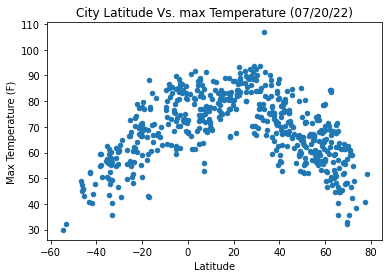

In [393]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", figsize=(6,4),
              title="City Latitude Vs. max Temperature (07/20/22)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('lat_temp.png')
plt.show()


The plot shows the temperature is higher when latitude approching the equator,and vice versa. 

## Latitude vs. Humidity Plot

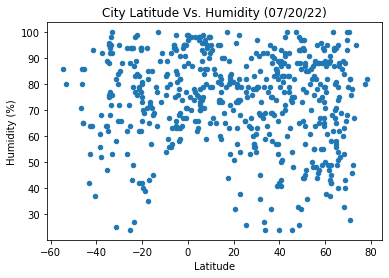

In [391]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", figsize=(6,4),
              title="City Latitude Vs. Humidity (07/20/22)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('lat_humidity.png')
plt.show()


The plot shows the cities around the equator have high humidity generally.

## Latitude vs. Cloudiness Plot

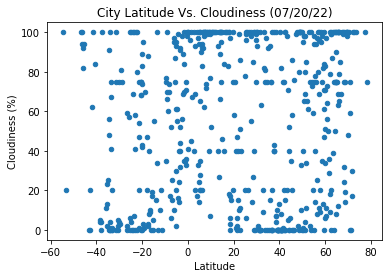

In [394]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", figsize=(6,4),
              title="City Latitude Vs. Cloudiness (07/20/22)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('lat_cloudiness.png')
plt.show()

There is no obvious relation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

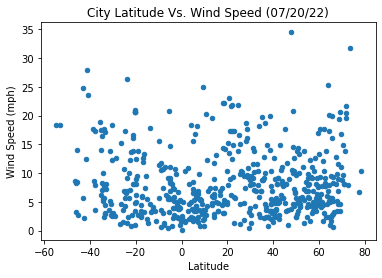

In [395]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", figsize=(6,4),
              title="City Latitude Vs. Wind Speed (07/20/22)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('lat_windspeed.png')
plt.show()

There is no obvious relation between latitude and wind speed.

## Linear Regression

In [364]:
northern_hemisphere=weatherdata_pd.loc[weatherdata_pd['Lat']>=0]
southern_hemisphere=weatherdata_pd.loc[weatherdata_pd['Lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3656260026393441


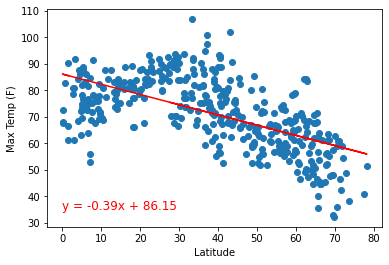

In [397]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.text(0,35, line_eq, horizontalalignment='left', size='large', color='red')
print(f"The r-value is: {rvalue**2}")

plt.savefig('LR_lat_temp_nh.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6221994077276535


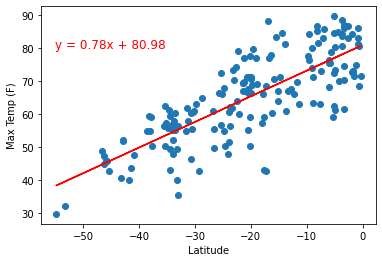

In [398]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.text(-55,80, line_eq, horizontalalignment='left', size='large', color='red')
print(f"The r-value is: {rvalue**2}")

plt.savefig('LR_lat_temp_sh.png')
plt.show()

In Northern Hemisphere, the temperature falls as the latitude increases generally. However, the temprature around eqator doesn't seem to be the highest, this might be a result of it's higher cloudiness, futher study is needed. 
In Southern Hemisphere,the temperature climbs as the latitude increases.
Positive corelation between these two factors.

####  Nouthern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01917931636348378


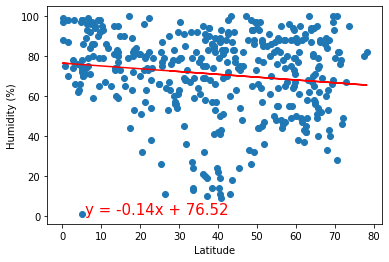

In [399]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue**2}")

plt.savefig('LR_lat_humidity_nh.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.009096272932609879


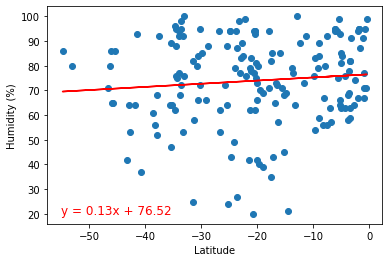

In [400]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.text(-55,20, line_eq, horizontalalignment='left', size='large', color='red')
print(f"The r-value is: {rvalue**2}")

plt.savefig('LR_lat_humidity_sh.png')
plt.show()

In Northern Hemisphere, the humidity is slighterly lower when the latitue increases.
In Southern Hemisphere, the humidity is slighterly higher when the latitue increases.
.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.002454654351785839


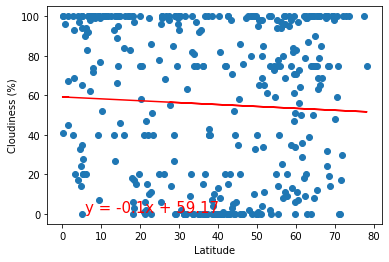

In [401]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue**2}")

plt.savefig('LR_lat_cloudiness_nh.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.012822275205937437


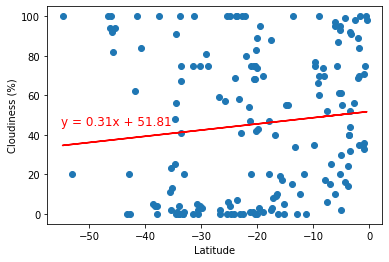

In [402]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.text(-55,45, line_eq, horizontalalignment='left', size='large', color='red')
print(f"The r-value is: {rvalue**2}")

plt.savefig('LR_lat_cloudiness_sh.png')
plt.show()

In Northern Hemisphere, the cloudiness is slighterly lower when the latitue increases.
In Southern Hemisphere, the cloudiness is slighterly higher when the latitue increases.
Southern hemisphere has lower cloudiness when comparing with northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011819364960656636


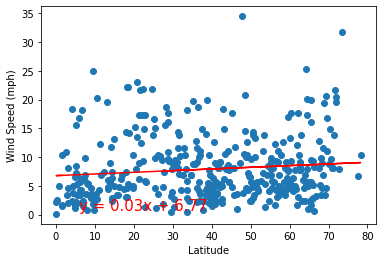

In [403]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue**2}")

plt.savefig('LR_lat_windspeed_nh.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09423704978346717


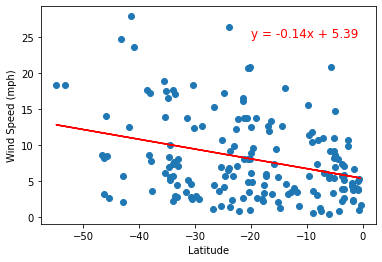

In [404]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.text(-20,25, line_eq, horizontalalignment='left', size='large', color='red')
print(f"The r-value is: {rvalue**2}")

plt.savefig('LR_lat_windspeed_sh.png')
plt.show()

In Northern Hemisphere, the wind speed is slighterly higher when the latitue increases.
In Southern Hemisphere, the wind speed is slighterly lower when the latitue increases.
Overall,the wind speed is more extreme in southern hemisphere, 0 mph to 15 mph in norththern and 0 mph to 20 mph in southern.